# t-SNE for community composition data

**Housekeeping**

In [1]:
library(caret)
library(gridExtra)
library(reshape2)
library(Rtsne)
library(tidyr)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘tidyr’

The following object is masked from ‘package:reshape2’:

    smiths



**Read in data**

In [2]:
species_composition = read.table("../../../data/amplicon/rel_abund.txt", 
                                 sep = "\t",
                                 header = T,
                                 row.names = 1)

metadata = read.table("../../../data/amplicon/meta.txt",
                      sep = "\t",
                      header = T,
                      row.names = 1)

# inspect

head(species_composition)
head(metadata)

,Citrobacter_koseri_HAMBI_1287,Elizabethkingia_meningoseptica_HAMBI_1875,Aeromonas_caviae_HAMBI_1972,Pseudomonas_chlororaphis_HAMBI_1977,Sphingobacterium_spiritivorum_HAMBI_1896,Comamonas_testosteroni_HAMBI_403,Agrobacterium_tumefaciens_HAMBI_105,Stenotrophomonas_maltophilia_HAMBI_2659,Myroides_odoratus_HAMBI_1923,Morganella_morganii_HAMBI_1292,⋯,Roseomonas_gilardii_HAMBI_2470,Cupriavidus_necator_HAMBI_2164,Escherichia_coli_JE2571.RP4.,Paraburkholderia_caryophylli_HAMBI_2159,Chitinophaga_filiformis_HAMBI_1966,Thermomonas_haemolytica_HAMBI_2467,Moraxella_canis_HAMBI_2792,Acinetobacter_lwoffii_HAMBI_97,Pseudomonas_putida_HAMBI_6,Chitinophaga_sancti_HAMBI_1988
T12_I0_AB0_REP1,0.02044547,0.1950614,0.2713066,0.1746159,0.002609835,0.3269056022,5.283067e-05,0.00000000,0.0000000000,2.113227e-05,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP2,0.18956445,0.3435331,0.1276586,0.3231926,0.003979660,0.0002653106,8.843688e-05,0.00000000,0.0000000000,3.537475e-04,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP3,0.15960167,0.2744808,0.1932894,0.2805813,0.087605975,0.0000000000,0.000000e+00,0.00000000,0.0006279998,0.000000e+00,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP4,0.16116394,0.3383399,0.1873889,0.1478108,0.081355907,0.0047695225,6.591421e-03,0.00000000,0.0109758265,7.924517e-04,⋯,0,0.0000000000,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP5,0.17480631,0.2856506,0.2308473,0.1852274,0.017277655,0.0133419144,5.990247e-03,0.04039704,0.0019802470,1.732716e-03,⋯,0,0.0003465432,0,0,0,0,0,0,0.0000000000,0
T12_I0_AB0_REP6,0.24414392,0.2605325,0.2364341,0.1691945,0.018537243,0.0043815302,1.365015e-02,0.00000000,0.0129760701,3.875969e-03,⋯,0,0.0000000000,0,0,0,0,0,0,0.0001263903,0


,Immigration,Streptomycin,Replicate,Day
T12_I0_AB0_REP1,0,0,1,48
T12_I0_AB0_REP2,0,0,2,48
T12_I0_AB0_REP3,0,0,3,48
T12_I0_AB0_REP4,0,0,4,48
T12_I0_AB0_REP5,0,0,5,48
T12_I0_AB0_REP6,0,0,6,48


**Perform t-SNE analysis**

In [3]:
set.seed(9)
tsne_model_1 = Rtsne(as.matrix(species_composition), 
                     check_duplicates = FALSE, 
                     pca = TRUE, 
                     perplexity = 20, 
                     theta = 0.5, 
                     dims = 2)

Extract 2D matrix

In [4]:
d_tsne_1 = as.data.frame(tsne_model_1$Y)

# inspect

head(d_tsne_1)

V1,V2
-0.4981371,15.7451524
1.1656741,1.4900245
0.6827361,4.1984931
4.9926414,0.2909671
1.9644530,-1.4463321
1.3791262,-2.8358742


Add metadata

In [5]:
d_tsne_1$labels = rownames(species_composition)
metadata$labels = rownames(metadata)
d_tsne_1 = merge(d_tsne_1, metadata, by = "labels")

# inspect

head(d_tsne_1)

labels,V1,V2,Immigration,Streptomycin,Replicate,Day
T12_I0_AB0_REP1,-0.4981371,15.7451524,0,0,1,48
T12_I0_AB0_REP2,1.1656741,1.4900245,0,0,2,48
T12_I0_AB0_REP3,0.6827361,4.1984931,0,0,3,48
T12_I0_AB0_REP4,4.9926414,0.2909671,0,0,4,48
T12_I0_AB0_REP5,1.9644530,-1.4463321,0,0,5,48
T12_I0_AB0_REP6,1.3791262,-2.8358742,0,0,6,48


**Plot t-SNE results in 2D space**

Edit factors for plotting

In [6]:
# day

d_tsne_1$Day = ifelse(d_tsne_1$Day == 16, "before pulse", ifelse(d_tsne_1$Day == 32, "during pulse", "after recovery"))
d_tsne_1$Day = factor(d_tsne_1$Day, levels = c("before pulse", "during pulse", "after recovery"))

# immigration

d_tsne_1$Immigration = ifelse(d_tsne_1$Immigration == 0, "No immigration", "Immigration")

# day & immigration subtreatment

d_tsne_1$Subtreatment = paste(d_tsne_1$Immigration, d_tsne_1$Day, sep = ", ")
d_tsne_1$Subtreatment = factor(d_tsne_1$Subtreatment, levels = c('No immigration, before pulse',
                                                                 'No immigration, during pulse',
                                                                 'No immigration, after recovery', 
                                                                 'Immigration, before pulse',
                                                                 'Immigration, during pulse',
                                                                 'Immigration, after recovery'))

# antibiotic level

d_tsne_1$Streptomycin = ifelse(d_tsne_1$Streptomycin == 0, "No", 
                              ifelse(d_tsne_1$Streptomycin == 4, "Low",
                                    ifelse(d_tsne_1$Streptomycin == 16, "Intermediate", "High")))
d_tsne_1$Streptomycin = factor(d_tsne_1$Streptomycin, levels = c("No", "Low", "Intermediate", "High"))

Plot code

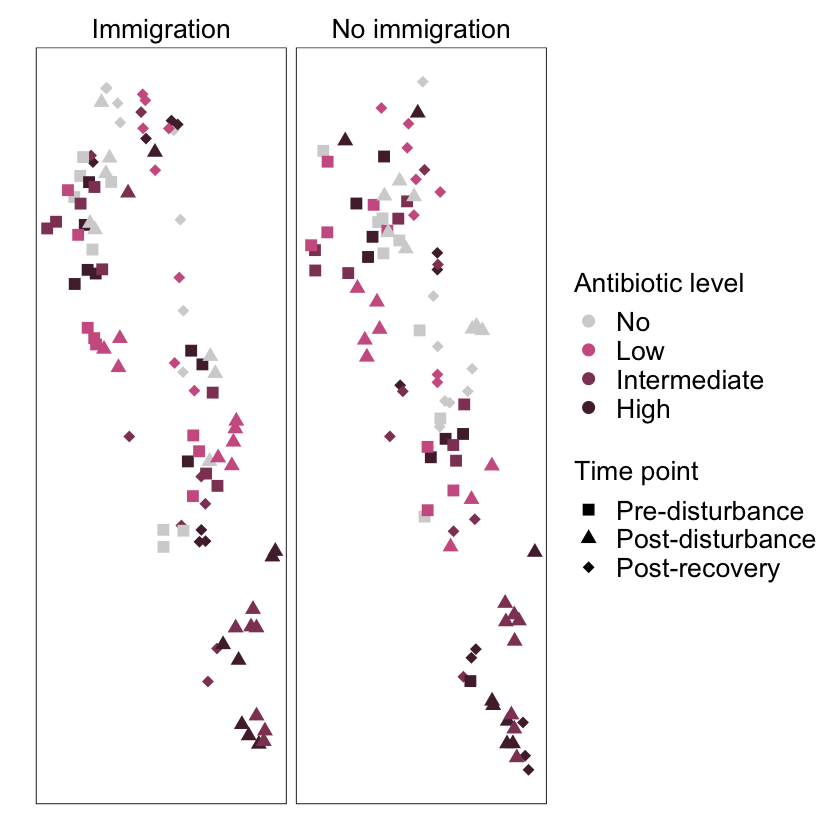

In [7]:
p1 = ggplot(d_tsne_1, aes(x = V1, y = V2, colour = Streptomycin, shape = Day)) +
    facet_grid(~Immigration) +
    geom_point(size = 3) +
    xlab("") + 
    ylab("") +
    scale_color_manual(values = c("#D3D3D3", "#cd6090", "#8f4364", "#522639")) + 
    scale_shape_manual(values = c(15, 17, 18), 
                       labels = c("Pre-disturbance", "Post-disturbance", "Post-recovery")) +
    theme_bw() +
    labs(colour = "Antibiotic level", shape = "Time point") +
    guides(colour = guide_legend(order = 1), shape = guide_legend(order = 2)) +
    theme(axis.text.x = element_blank(),
          axis.ticks.x = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          legend.text = element_text(size = 16),
          legend.title = element_text(size = 16),
          strip.text = element_text(size = 16, colour = "black"),
          strip.background = element_rect(colour = "white", fill = "white"),
          panel.border = element_rect(colour = "black", size = 0.5),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())
p1

**Save figure**

In [8]:
# ggsave("../../../manuscript/figures/t-SNE_community_composition.pdf", 
#       width = 11)